# FIFA 2022
   Project by : P M Ranasinghe

### Analyzing the Available Data

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import random
from IPython.display import Image
random_num=122

In [2]:
#Reading the dataset

df=pd.read_csv("results.csv")
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [3]:
df.describe()

,home_score,away_score
count,42082.000000,42082.000000
mean,1.743691,1.186541
std,1.752459,1.403957
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [4]:
#Preprocessing
#Finding outmissing values

df.isnull().sum()
#No any missing values
#We are good to go

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

([<matplotlib.axis.XTick at 0x1c8c5fc47f0>,
 [Text(1, 0, 'Home Score'), Text(2, 0, 'Away Score')])

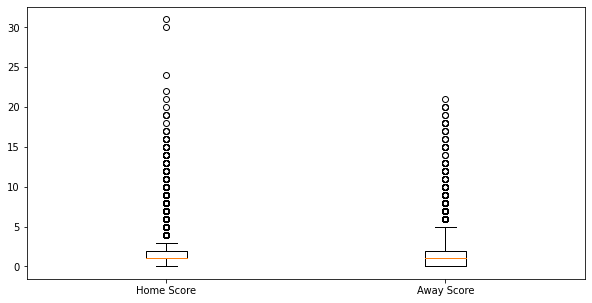

In [5]:
#finding outliers in the numerical data columns

fig = plt.figure(figsize =(10, 5))
plt.boxplot([df["home_score"],df["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

In [6]:
#Boxplot says there are many outliers
#Let's remove those outlier,It will make our Machine Learning model more accurate
#Asume maximum goals that one team can score is 15

higher_home=15
higher_away=15
df=df[(df["home_score"]<higher_home) & (df["away_score"]<higher_away)]
df.head(5)
#Dataset after removing outliers

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#Making a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team

conditions  = [df["home_score"] ==df["away_score"], df["home_score"] > df["away_score"] , df["home_score"] < df["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df["Win_Statues"] = np.select(conditions, choices)
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


In [8]:
#See what are the Countries in the dataset

countries=df.home_team.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 306 Countries in the home_team Column

Countries-['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Paraguay' 'Japan' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis' 'Panama' 'Slovakia'
 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghan

**Type of the Matches**

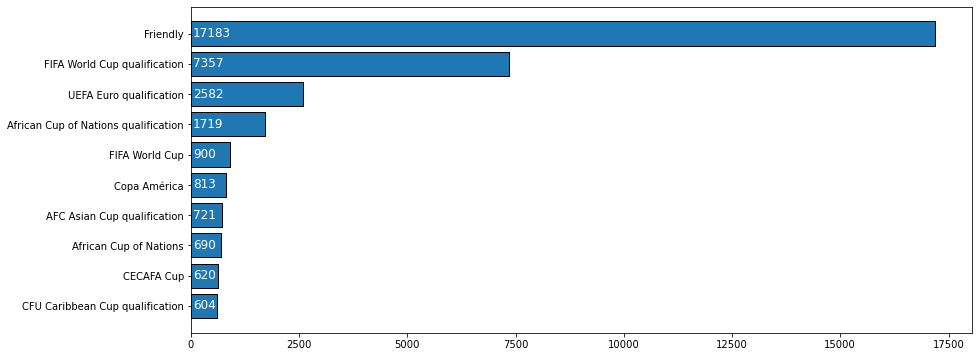

In [9]:
rank_bound = 10
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

**Teams played most Matches**

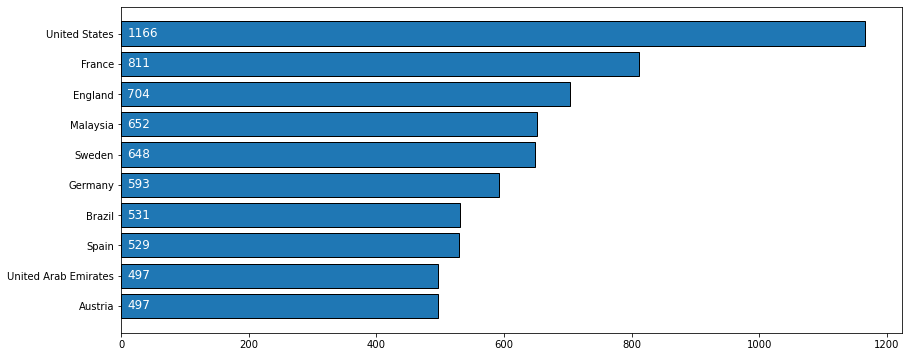

In [10]:
rank_bound = 10
ax = df.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

**Number of Matches played in equal intervals**

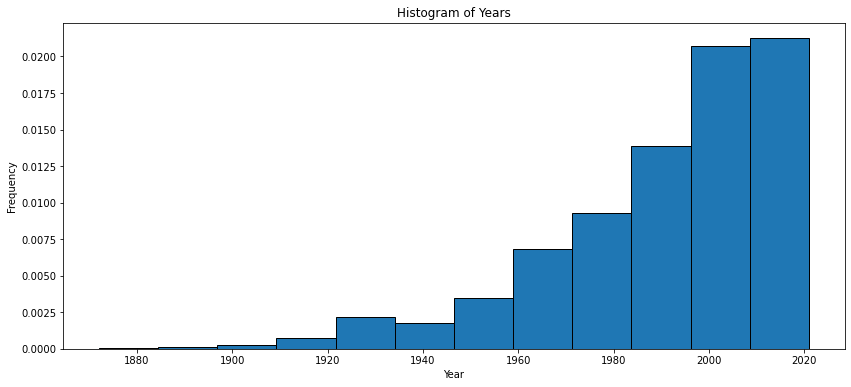

In [11]:
years = []
for date in df.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

#Most matches are played after 1960

### (1) Finding out the impact hosting a major tournament helps a country's chances in winning matches?

In [12]:
#Now take the rpws that home_team==Country 
#Nad romove the data of friendly matches

data_home=df.loc[df["home_team"]==df["country"] ]
data_home=df.loc[df["tournament"] != "Friendly"]
data_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,Lost
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,Win
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,Lost
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,Win
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,Lost


In [13]:
#How home team performs in tournament matches

tournament_df=pd.crosstab(data_home["tournament"], data_home["Win_Statues"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(10)
tournament_df.style.bar(color="brown",subset=["Draw","Lost","Win","All"])

Win_Statues,Draw,Lost,Win,All
tournament,,,,
All,5388,7111,12350,24849
FIFA World Cup qualification,1570,2000,3787,7357
UEFA Euro qualification,506,815,1261,2582
African Cup of Nations qualification,418,353,948,1719
FIFA World Cup,199,290,411,900
Copa América,172,225,416,813
AFC Asian Cup qualification,123,174,424,721
African Cup of Nations,193,186,311,690
CECAFA Cup,147,185,288,620


Text(0.5, 1.0, 'Home Team Winning Status')

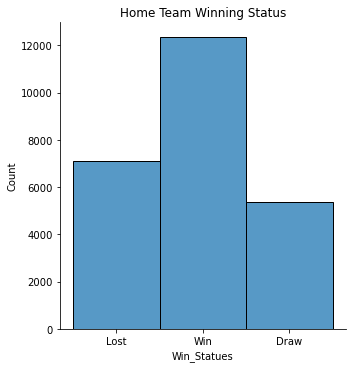

In [14]:
#Home team results
sns.displot(data_home, x="Win_Statues")
plt.title("Home Team Winning Status")

In [15]:
data_home['Win_Statues'].value_counts()

Win     12350
Lost     7111
Draw     5388
Name: Win_Statues, dtype: int64

In [16]:
#How each team perform while playing a tournament in home grounds

teams_win_statues=pd.crosstab(df["home_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>200]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability")

#We can see teams has more than 50% wining probability while playing in the home grounds 

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,108,56,406,570,0.712281
Spain,66,49,249,364,0.684066
Argentina,120,68,362,550,0.658182
Ivory Coast,64,35,175,274,0.638686
Iran,61,42,177,280,0.632143
Nigeria,67,33,171,271,0.630996
Egypt,68,74,239,381,0.627297
Italy,119,49,281,449,0.625835
Germany,109,84,320,513,0.623782


In [17]:
#Teams playing in away conditions

teams_away_statues=pd.crosstab(df["away_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>200]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues_100.head(20)

#The probability to wining a tournament in away conditions is very low comapred to the winning probalities in home conditions

Win_Statues,Draw,Win,Win,Total,team_win_probability
away_team,,,,,
Brazil,91,223,101,415,0.537349
Germany,89,240,119,448,0.535714
England,134,266,115,515,0.516505
Spain,97,162,82,341,0.475073
South Korea,110,177,109,396,0.446970
Netherlands,81,163,129,373,0.436997
Russia,115,175,111,401,0.436409
Iran,67,96,57,220,0.436364
Japan,53,111,93,257,0.431907


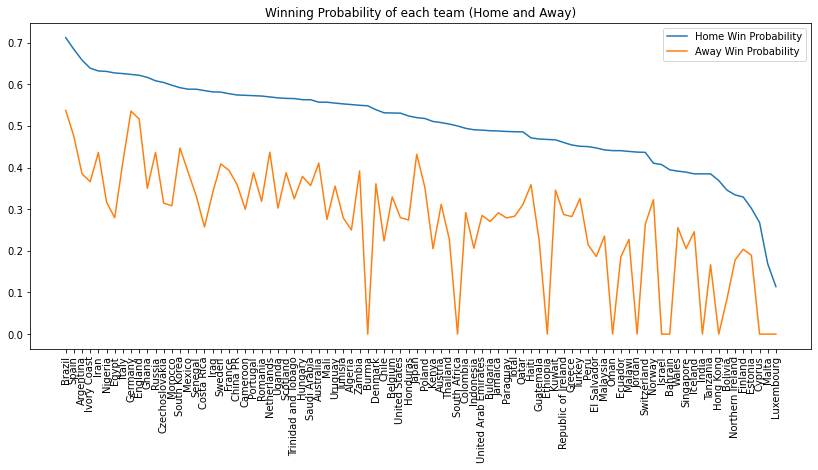

In [18]:
#Making a plot to identify wining possibilities in both home and away conditions

win_prob={teams_win_statues_100.iloc[i,:].name:[teams_win_statues_100.iloc[i,4]] for i in range(teams_win_statues_100.shape[0])}
for i in range(teams_away_statues_100.shape[0]):
    try:
        win_prob[teams_away_statues_100.iloc[i,:].name].append(teams_away_statues_100.iloc[i,4]) 
    except:
        pass
country_names=win_prob.keys()
lst_home=[i[0] for i in win_prob.values()]

lst_away=[]
for i in win_prob.values():
    if len(i)==2:
        lst_away.append(i[1])
    else:
        lst_away.append(0)

plt.figure(figsize=(14,6))
plt.plot(country_names,lst_home, label = "Home Win Probability")
plt.plot(country_names, lst_away, label = "Away Win Probability")
plt.xticks(rotation = 90)
plt.title("Winning Probability of each team (Home and Away)")
plt.legend()
plt.show()

Blue line is alway above the yellow line,showing home winning possibilies are always higher.

**Finally by analysing the data, we can identify that the home team has a clear edge while playing a tournament in their home grounds**



### (2) Finding Most Succesful Team

**Finding the team which performs best in home conditions each year interval**

In [19]:
#Home Conditions
#Convert the data set into 10 terms and findsout who has done best at each term 

range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=df.iloc[start:end]
    best_teams=pd.crosstab(term["home_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
    ##Lets take teams which plays atleast 20 games
    best_teams["team_win_probability"]=best_teams["Win"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    if (best_teams.shape[0]>2):
        print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")

No Enough data to find the best team in the term: 1872-1886 

Best 2 team in the term: 1886-1900 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      1 |      3 |    18 |      22 |               0.818182 |
| Scotland    |      3 |      3 |    16 |      22 |               0.727273 |

Best 2 team in the term: 1900-1914 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      6 |      1 |    14 |      21 |               0.666667 |
| Hungary     |      6 |      3 |    16 |      25 |               0.64     |

Best 2 team in the term: 1914-1928 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Denmark     |      4 |      3 |    19 |      26 |       

**Finding the team which performs best in away conditions each year interval**

In [20]:
#Away Conditions
##Convert the data set into 10 terms and findsout who has done best at each term 

range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=df.iloc[start:end]
    best_teams=pd.crosstab(term["away_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
    ##Lets take teams which plays atleast 200 games
    best_teams["team_win_probability"]=best_teams["Lost"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
    if (best_teams.shape[0]>2):
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")


Best 2 team in the term: 1872-1886 
No Enough data to find the best team in the term: 1872-1886 

Best 2 team in the term: 1886-1900 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Scotland    |      4 |     13 |     4 |      21 |               0.619048 |
| Total       |     11 |     30 |    44 |      85 |               0.352941 |

Best 2 team in the term: 1900-1914 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      6 |     18 |     4 |      28 |               0.642857 |
| Total       |     44 |     91 |   123 |     258 |               0.352713 |

Best 2 team in the term: 1914-1928 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      

### (3) FIFA World Cup -2022- QATAR

**Making a ML model**

In [21]:
df_match=df.copy() #making a copy of the main dataframe for future use
df_match.head(8)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Lost
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Lost


In [22]:
#Making a new dataset with required features to train the machine learning model
#Year,Played Country,Team_1,team_2,team_1 score,team_2 score

New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,1],df_match.values[:,2],df_match.values[:,3],df_match.values[:,4])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
#Making a new dataset by changing the team_1 and team_2 and their respective scores
New_Dataset_part_2=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,2],df_match.values[:,1],df_match.values[:,4],df_match.values[:,3])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset =New_Dataset.sample(frac=1).reset_index(drop=True) #Shaffling the dataset
New_Dataset.head(5)

,year,Country,team_1,team_2,team_1_score,team_2_score
0,1956,Brazil,Brazil,Uruguay,2,0
1,1960,Tunisia,German DR,Tunisia,3,0
2,1986,Egypt,Morocco,Cameroon,1,1
3,2006,United Arab Emirates,Pakistan,United Arab Emirates,2,3
4,2014,Guinea-Bissau,Guinea-Bissau,Central African Republic,3,1


In [23]:
#Creating a list containg all the names of the countries

teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)

343

,year,team_1_score,team_2_score
year,1.000000,-0.127807,-0.127807
team_1_score,-0.127807,1.000000,-0.160107
team_2_score,-0.127807,-0.160107,1.000000


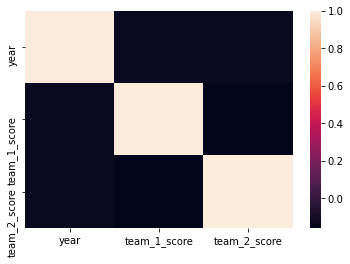

In [24]:
#Making a heatmap to see the correlation of each columns 

sns.heatmap(New_Dataset.corr())
New_Dataset.corr()

In [25]:
#Defining the features and labels(Targets)

Y= New_Dataset.iloc[:,4:6] #Training targets (team_1_score and team_2_score)
categorized_data=New_Dataset.iloc[:,0:4].copy() #Traing features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

#Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")


In [26]:
#Input Fatures to the model (x)

categorized_data.head(5)

,year,Country,team_1,team_2
0,1956,316,39,316
1,1960,302,111,302
2,1986,49,194,49
3,2006,311,222,311
4,2014,56,126,56


In [27]:
#Targets to the model (Y)

Y.head(5)

,team_1_score,team_2_score
0,2,0
1,3,0
2,1,1
3,2,3
4,3,1


In [28]:
#Info about the X and Y dataframes

print(categorized_data.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84064 entries, 0 to 84063
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     84064 non-null  int64   
 1   Country  84064 non-null  category
 2   team_1   84064 non-null  category
 3   team_2   84064 non-null  category
dtypes: category(3), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84064 entries, 0 to 84063
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   team_1_score  84064 non-null  int64
 1   team_2_score  84064 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB
None


In [221]:
#Making the model

X=categorized_data
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = MultiOutputRegressor(RandomForestClassifier())
model.fit(X,Y)

MultiOutputRegressor(estimator=RandomForestClassifier())

In [222]:
#Making the predictions

prd=model.predict(X)
prd

array([[0, 0],
       [3, 0],
       [1, 1],
       ...,
       [2, 0],
       [1, 2],
       [1, 0]], dtype=int64)

In [223]:
#Creating the Confusion matrix for each predictions

score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(list(Y.iloc[:,0]),score_team_1)
cm2=confusion_matrix(list(Y.iloc[:,1]),score_team_2)

Text(159.0, 0.5, 'Predicted')

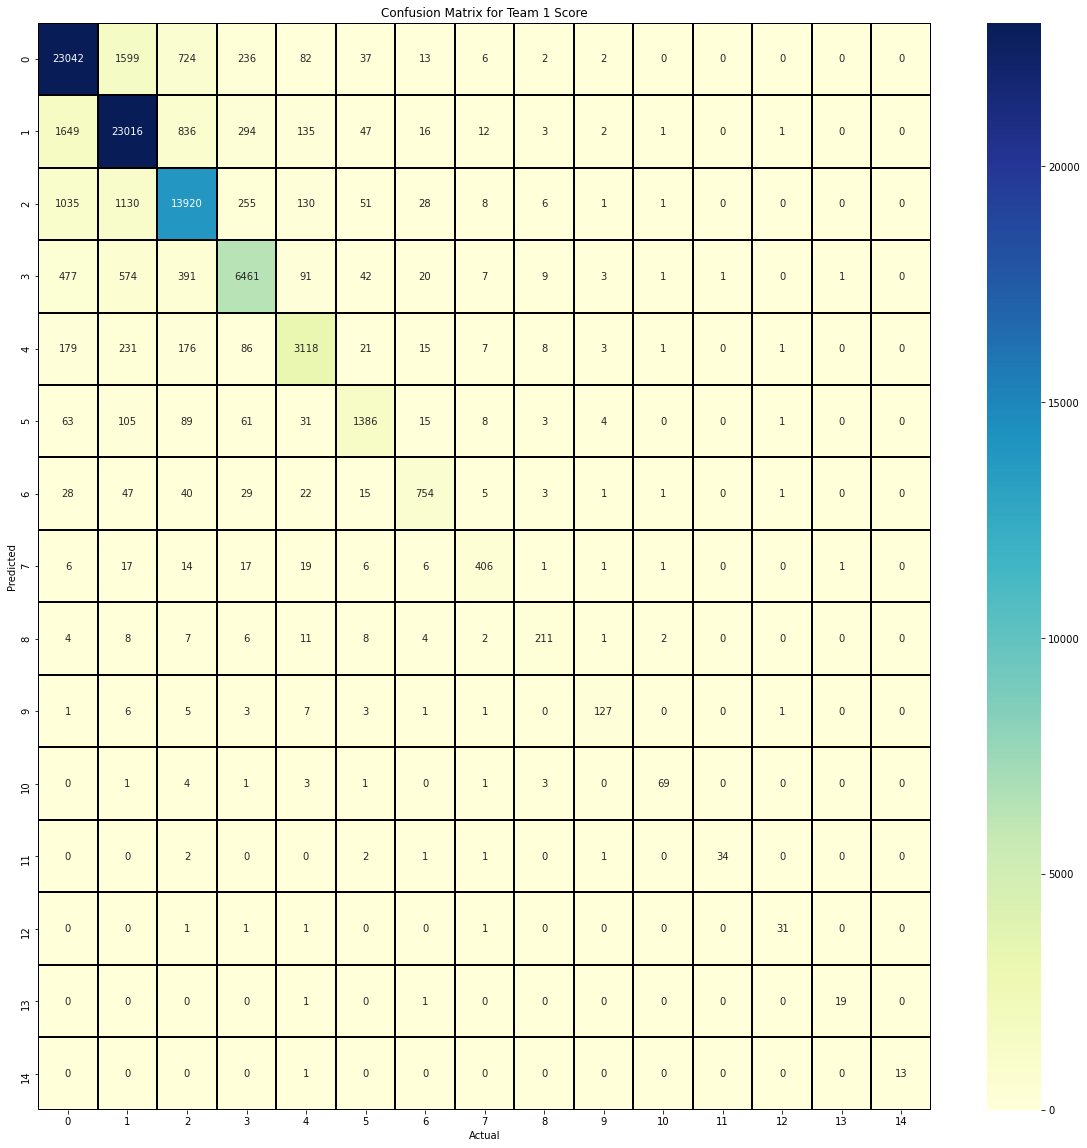

In [224]:
#Plotting the Confussion Matrix for score of team 01

plt.figure(figsize=(20,20))
sns.heatmap(cm1, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for Team 1 Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [225]:
#Classification Report to team 1 Score

from sklearn.metrics import classification_report
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)

#Has a good Accuracy in predicting the team 1 Score

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     25743
           1       0.86      0.88      0.87     26012
           2       0.86      0.84      0.85     16565
           3       0.87      0.80      0.83      8078
           4       0.85      0.81      0.83      3846
           5       0.86      0.78      0.82      1766
           6       0.86      0.80      0.83       946
           7       0.87      0.82      0.85       495
           8       0.85      0.80      0.82       264
           9       0.87      0.82      0.84       155
          10       0.90      0.83      0.86        83
          11       0.97      0.83      0.89        41
          12       0.86      0.89      0.87        35
          13       0.90      0.90      0.90        21
          14       1.00      0.93      0.96        14

    accuracy                           0.86     84064
   macro avg       0.88      0.84      0.86     84064
weighted avg       0.86   

Text(159.0, 0.5, 'Predicted')

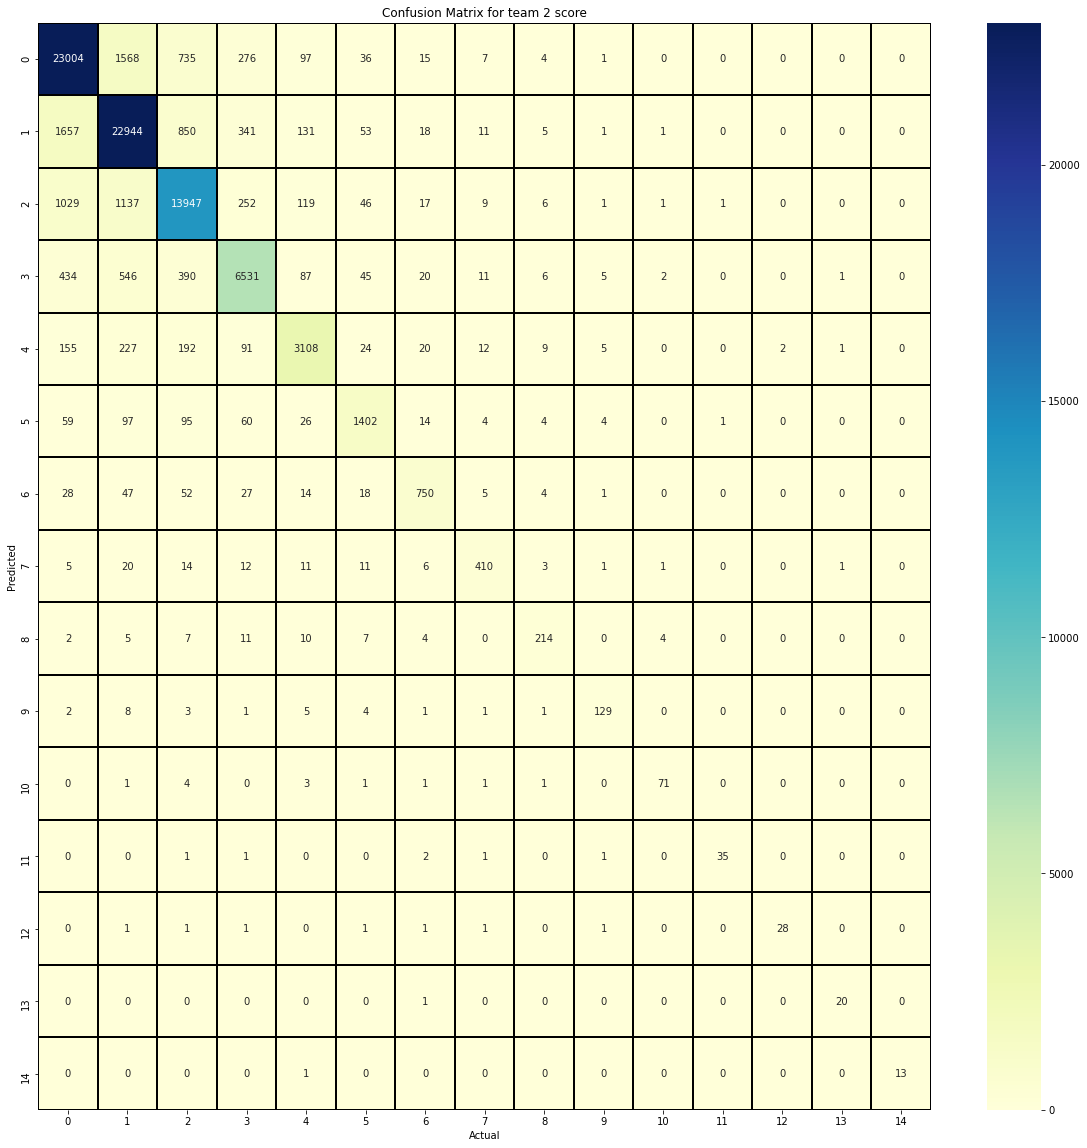

In [226]:
#Plotting the Confussion Matrix for score of team 02

plt.figure(figsize=(20,20))
sns.heatmap(cm2, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for team 2 score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [227]:
#Classification Report to team 2 Score

report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

#Has a good Accuracy in predicting the team 1 Score#

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     25743
           1       0.86      0.88      0.87     26012
           2       0.86      0.84      0.85     16565
           3       0.86      0.81      0.83      8078
           4       0.86      0.81      0.83      3846
           5       0.85      0.79      0.82      1766
           6       0.86      0.79      0.83       946
           7       0.87      0.83      0.85       495
           8       0.83      0.81      0.82       264
           9       0.86      0.83      0.85       155
          10       0.89      0.86      0.87        83
          11       0.95      0.85      0.90        41
          12       0.93      0.80      0.86        35
          13       0.87      0.95      0.91        21
          14       1.00      0.93      0.96        14

    accuracy                           0.86     84064
   macro avg       0.88      0.85      0.86     84064
weighted avg       0.86   

In [151]:
#Fuction to Select the winning team for the prediction array

def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [152]:
#Sample Prediction

mactch_played=2015
team_1="Sri Lanka"
team_2="Brazil"
stadium="Qatar"

team_lst=[team_1,team_2]
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} -{team_1_num}")
print(f"Team 02 is {team_2} -{team_2_num}")
print(f"Played in  {stadium} -{stadium_num}")

Team 01 is Sri Lanka -281
Team 02 is Brazil -39
Played in  Qatar -237


In [153]:
#Sample Prediction Output

X_feature=np.array([[mactch_played,stadium_num,team_1_num,team_2_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_2} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽⚽\n") 

Sri Lanka vs Brazil 
 Brazil wins 🏆⚽🎯



**FIFA WORLD CUP - 2022 -**

I have selected 64 teams that has the maximum posibility to participate in FIFA World Cup.
These are the best 64 teams accordingto the current world ranking.

Every team plays with evey one-else(League System).That means one team plays 63 matches.Then from the model I predict who is going to win the match.
* Winning team gets 02 Point
* Match draw (Both teams scored same number of goals)- both teams get 1 points each
* Team Lost gets no points

According this points system final winner will be selected

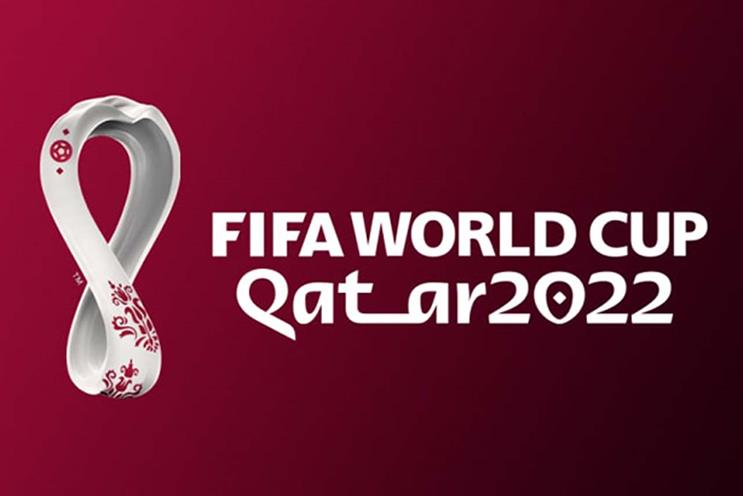

In [154]:
Image(filename='Logo.JPG')

In [199]:
Group_A= ["Uruguay","Russia","Saudi Arabia","Egypt"]
Group_B= ["Portugal","Spain","Morocco","Iran"]
Group_C= ["France","Denmark","Australia","Peru"]
Group_D= ["Argentina","Croatia","Iceland","Nigeria"]
Group_E= ["Brazil","Switzerland","Costa Rica","Serbia"]
Group_F= ["South Korea","Mexico","Sweden","Germany"]
Group_G= ["Belgium","England","Panama","Tunisia"]
Group_H= ["Senegal","Japan","Poland","Colombia"]
Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,"Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}

In [200]:
#Initialize basic parameters

year=2022
stadium="Qatar"
stadium_num=label_encoder.transform([stadium])[0]
host_num=stadium_num

In [201]:
##Group stage Matches

Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"{grp_name} Matches")
    probable_countries=Groups[grp_name]
    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=label_encoder.transform([team_1])[0]
        team_wins=0
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_2_num=label_encoder.transform([team_2])[0]
            team_lst=[team_1,team_2]
            Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num]])
            res=model.predict(Input_vector)

            win,prob_lst=select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]

            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \n  Results of the Match {res[0]}\n   {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    
                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    
                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
                print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\n   Match Draw ⚽⚽⚽\n") 
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1
                
                draw_dct[team_1] = draw_dct.get(team_1,0)+1
                draw_dct[team_2] = draw_dct.get(team_2,0)+1
                
                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)
                
                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)
                    
            j=j+1
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results

Group A Matches
 Uruguay vs Russia 
  Results of the Match [1 0]
   Uruguay wins 🎊🏆⚽🎖️

 Uruguay vs Saudi Arabia 
  Results of the Match [1 0]
   Uruguay wins 🎊🏆⚽🎖️

Uruguay vs Egypt 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Russia vs Saudi Arabia 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

 Russia vs Egypt 
  Results of the Match [0 1]
   Egypt wins 🎊🏆⚽🎖️

Saudi Arabia vs Egypt 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Group B Matches
 Portugal vs Spain 
  Results of the Match [1 2]
   Spain wins 🎊🏆⚽🎖️

 Portugal vs Morocco 
  Results of the Match [1 0]
   Portugal wins 🎊🏆⚽🎖️

 Portugal vs Iran 
  Results of the Match [2 1]
   Portugal wins 🎊🏆⚽🎖️

Spain vs Morocco 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

 Spain vs Iran 
  Results of the Match [1 0]
   Spain wins 🎊🏆⚽🎖️

Morocco vs Iran 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Group C Matches
France vs Denmark 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

France vs Australia 
  Results of the Match 

In [211]:
#Display group stage results

for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))
    
    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))
    
    lst_teams=list(team_wins_dct.keys())
    
    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())
    
    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())
    



Group A Final Rankings
|    | Team         |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:-------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Uruguay      |      2 |      1 |      0 |             2 |              0 |                 2 |        5 |
|  2 | Egypt        |      1 |      2 |      0 |             1 |              0 |                 1 |        4 |
|  3 | Saudi Arabia |      0 |      2 |      1 |             0 |              1 |                -1 |        2 |
|  4 | Russia       |      0 |      1 |      2 |             0 |              2 |                -2 |        1 |


Group B Final Rankings
|    | Team     |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:---------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Spain    |      2 |      1 |      0 |          

In [213]:
##Round of 16 Section_1

qualified_teams_1=[]
standings=list(Group_standings.keys())
i=0
print(f"Round of 16\n")
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[0][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[1][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(team_lst[win])
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(winning_team)
    i=i+2
    
##Round of 16 Section_2
qualified_teams_2=[]
standings=list(Group_standings.keys())
i=0
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[1][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[0][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(winning_team)
    i=i+2

Round of 16

Uruguay vs Portugal 
  Match Draw ⚽⚽
   Uruguay wins at Penaly Shoot-Out 🥅🎯
    Uruguay into the Quater-Finals ⏩⏩ 

Denmark vs Iceland 
  Match Draw ⚽⚽
   Denmark wins at Penaly Shoot-Out 🥅🎯
    Denmark into the Quater-Finals ⏩⏩ 

Brazil vs Mexico 
  Brazil wins 🏆🏆
    Brazil into the Quater-Finals ⏩⏩ 

Belgium vs Colombia 
  Belgium wins 🏆🏆
    Belgium into the Quater-Finals ⏩⏩ 

Egypt vs Spain 
  Egypt wins 🏆🏆
    Egypt into the Quater-Finals ⏩⏩ 

France vs Argentina 
  France wins 🏆🏆
    France into the Quater-Finals ⏩⏩ 

Switzerland vs Germany 
  Switzerland wins 🏆🏆
    Switzerland into the Quater-Finals ⏩⏩ 

England vs Poland 
  England wins 🏆🏆
    England into the Quater-Finals ⏩⏩ 



In [214]:
print(f"Teams selected to the Quater Finals - {qualified_teams_1+qualified_teams_2}")

Teams selected to the Quater Finals - ['Uruguay', 'Denmark', 'Brazil', 'Belgium', 'Egypt', 'France', 'Switzerland', 'England']


In [215]:
#Quarter Finals

Semifinal_teams=[]
i=0
print(f"Quater Final Matches\n")
while i < (len(qualified_teams_1))-1:
    team_1= qualified_teams_1[i]
    team_2= qualified_teams_1[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2
    
i=0
while i < (len(qualified_teams_2))-1:
    team_1= qualified_teams_2[i]
    team_2= qualified_teams_2[i+1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2

Quater Final Matches

Uruguay vs Denmark 
  Uruguay wins 🏆🏆
    Uruguay into the Semi-Finals ⏩⏩ 

Brazil vs Belgium 
  Brazil wins 🏆🏆
    Brazil into the Semi-Finals ⏩⏩ 

Egypt vs France 
  Match Draw ⚽⚽
   France wins at Penaly Shoot-Out 🥅🎯
    France into the Semi-Finals ⏩⏩ 

Switzerland vs England 
  England wins 🏆🏆
    England into the Semi-Finals ⏩⏩ 



In [216]:
print(f"Teams selected to the Semi-Finals - {Semifinal_teams}")

Teams selected to the Semi-Finals - ['Uruguay', 'Brazil', 'France', 'England']


In [217]:
#Semi Finals

final_teams=[]
third_place_match_teams=[]
i=0
print(f"Semi Final Matches\n")
while i < (len(Semifinal_teams))-1:
    team_1= Semifinal_teams[i]
    team_2= Semifinal_teams[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the FiIFA-Finals ⏩⏩ \n")
            final_teams.append(team_lst[win])
            third_place_match_teams.append(team_lst[(win+1)%2])

            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the FIFA-Finals ⏩⏩ \n")
            final_teams.append(winning_team)
            team_lst.remove(winning_team)
            third_place_match_teams.append(team_lst[0])
    i=i+2
    

Semi Final Matches

Uruguay vs Brazil 
  Brazil wins 🏆🏆
    Brazil into the FiIFA-Finals ⏩⏩ 

France vs England 
  France wins 🏆🏆
    France into the FiIFA-Finals ⏩⏩ 



In [218]:
print(f"Teams selected to the Finals - {final_teams}")
print(f"Teams selected to the Third Place match - {third_place_match_teams}")

Teams selected to the Finals - ['Brazil', 'France']
Teams selected to the Third Place match - ['Uruguay', 'England']


In [219]:
#Finals and Third Place match

print(f"FiIFA FINAl\n")
team_1= final_teams[1]
team_2= final_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} are the Winners 🎉🏆🎉\n\n")
    winner=team_lst[win]
    place_2=team_lst[(win+1)%2]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} are the Winners 🎉🏆🎉\n\n")
    winner=winning_team
    
    team_lst.remove(winning_team)
    place_2=team_lst[0]

print(f"Third Place match\n")
team_1= third_place_match_teams[1]
team_2= third_place_match_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=team_lst[win]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=winning_team
    

    
print(f"\n\nWinner is {winner} 🥇🥇🥇")
print(f"Runner-up is {place_2} 🥈🥈🥈")
print(f"3rd Place is {place_3} 🥉🥉🥉")

FiIFA FINAl

France vs Brazil 
  France are the Winners 🎉🏆🎉


Third Place match

England vs Uruguay 
  England Wins the 3rd Place 🎉🏆🎉



Winner is France 🥇🥇🥇
Runner-up is Brazil 🥈🥈🥈
3rd Place is England 🥉🥉🥉


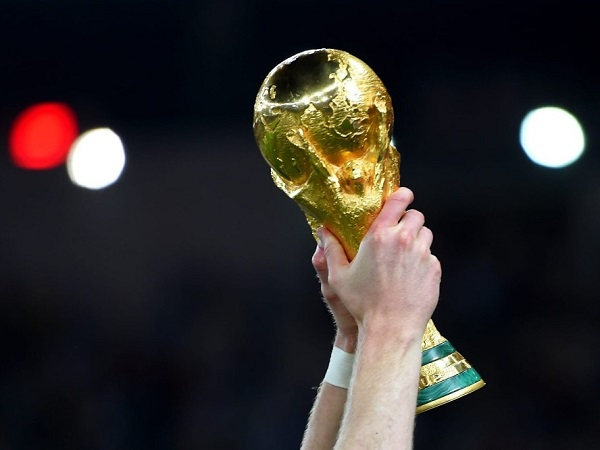

In [220]:
Image(filename='Fi.JPG')